<h1>Testando modelos com as 20 melhores colunas</h1>

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
#from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
#from sklearn.linear_model import LogisticRegression # algoritmo Regressão Logística
#from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
#from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
#from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
#from sklearn.svm import SVC # algoritmo SVM
#from sklearn.preprocessing import MinMaxScaler

#Regressão
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_csv('datasets/DADOS_ED_PROCESSADOS_REGRESSAO.csv', encoding="latin-1", sep = ';')
df

,TX_APR,TX_REP,TX_ABD,TNR,TDI,IRD,IED_NIVEL1,IED_NIVEL2,IED_NIVEL3,IED_NIVEL4,...,QT_TUR_INF,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE,VL_OBSERVADO_2021
0,100.0,0.0,0.0,2.0,4.0,2.8,33.4,33.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,0.0,5.9
1,100.0,0.0,0.0,9.5,0.0,2.7,75.0,0.0,0.0,25.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4.1
2,67.5,32.5,0.0,7.0,4.5,3.2,50.0,0.0,0.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,2.7
3,96.9,3.1,0.0,1.5,4.5,3.4,50.0,0.0,0.0,50.0,...,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,4.1
4,78.9,21.1,0.0,17.4,60.0,3.0,50.0,0.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54271,94.7,5.3,0.0,4.5,32.4,2.4,0.0,2.2,76.6,8.5,...,0.0,0.0,0.0,16.0,10.0,6.0,33.0,33.0,0.0,4.4
54272,93.9,4.1,2.0,2.8,37.0,2.5,0.0,0.0,80.5,14.6,...,0.0,0.0,0.0,10.0,0.0,10.0,35.0,35.0,0.0,5.2
54273,98.4,1.6,0.0,4.8,17.5,1.7,0.0,0.0,85.7,14.3,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,5.2
54274,96.2,3.8,0.0,3.0,23.9,2.4,0.0,19.2,71.2,7.7,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,23.0,0.0,4.8


In [9]:
df_ed = df.iloc[:,:-1]
alvo = df.iloc[:,-1].values

print(alvo)

#NORMALIZAR O CONJUNTO SEPARADO

#scaler = MinMaxScaler()
#col_names = df_ed.columns

# Transformar os atributos
#df_ed = pd.DataFrame(scaler.fit_transform(df_ed))
#df_ed.columns = col_names

df_ed

[5.9 4.1 2.7 ... 5.2 4.8 4.7]


,TX_APR,TX_REP,TX_ABD,TNR,TDI,IRD,IED_NIVEL1,IED_NIVEL2,IED_NIVEL3,IED_NIVEL4,...,QT_DOC_ESP_CE,QT_TUR_INF,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,100.0,0.0,0.0,2.0,4.0,2.8,33.4,33.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,0.0
1,100.0,0.0,0.0,9.5,0.0,2.7,75.0,0.0,0.0,25.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,67.5,32.5,0.0,7.0,4.5,3.2,50.0,0.0,0.0,50.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0
3,96.9,3.1,0.0,1.5,4.5,3.4,50.0,0.0,0.0,50.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
4,78.9,21.1,0.0,17.4,60.0,3.0,50.0,0.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54271,94.7,5.3,0.0,4.5,32.4,2.4,0.0,2.2,76.6,8.5,...,0.0,0.0,0.0,0.0,16.0,10.0,6.0,33.0,33.0,0.0
54272,93.9,4.1,2.0,2.8,37.0,2.5,0.0,0.0,80.5,14.6,...,0.0,0.0,0.0,0.0,10.0,0.0,10.0,35.0,35.0,0.0
54273,98.4,1.6,0.0,4.8,17.5,1.7,0.0,0.0,85.7,14.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,13.0,0.0
54274,96.2,3.8,0.0,3.0,23.9,2.4,0.0,19.2,71.2,7.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,23.0,0.0


In [10]:
df_classif = df.loc[:,['IN_LIXO_QUEIMA', 'AFD_GRP5', 'DSU', 'IN_MATERIAL_PED_DESPORTIVA', 'IN_INTERNET_ALUNOS', 'IN_PARQUE_INFANTIL', 'IN_QUADRA_ESPORTES_COBERTA', 'TP_LOCALIZACAO', 'IN_QUADRA_ESPORTES',
                       'IN_ESGOTO_FOSSA', 'QT_DESKTOP_ALUNO', 'TX_REP', 'IN_ESGOTO_REDE_PUBLICA', 'AFD_GRP1', 'QT_EQUIP_SOM', 'IN_INTERNET_APRENDIZAGEM', 'TX_ABD', 'IN_ORGAO_ASS_PAIS_MESTRES',
                       'TX_APR', 'TDI']]
df_classif_train, df_classif_test, alvo_train, alvo_test =  train_test_split(df_classif, alvo, test_size=0.20, random_state=7)


df_chi2 = df.loc[:,['IN_ESGOTO_FOSSA_COMUM', 'IN_ORGAO_GREMIO_ESTUDANTIL', 'IN_LABORATORIO_INFORMATICA', 'IN_NOTURNO', 'IN_QUADRA_ESPORTES', 'IN_AGUA_POCO_ARTESIANO',
                    'IN_INTERNET_APRENDIZAGEM', 'IN_INTERNET_ALUNOS', 'IN_MATERIAL_PED_ARTISTICAS', 'IN_QUADRA_ESPORTES_COBERTA', 'IN_ESGOTO_REDE_PUBLICA', 'TDI', 'IN_EJA_FUND',
                    'IN_ESGOTO_FOSSA', 'IN_EJA', 'IN_LIXO_DESTINO_FINAL_PUBLICO', 'IN_PARQUE_INFANTIL', 'TP_LOCALIZACAO', 'IN_LIXO_QUEIMA', 'IN_ORGAO_ASS_PAIS_MESTRES']]
df_chi2_train, df_chi2_test, alvo_train, alvo_test =  train_test_split(df_chi2, alvo, test_size=0.20, random_state=7)


df_mutual = df.loc[:,['TP_LOCALIZACAO', 'IN_TRATAMENTO_LIXO_SEPARACAO', 'IN_DESKTOP_ALUNO', 'IN_PARQUE_INFANTIL', 'TX_REP', 'TP_REDE_LOCAL', 'IN_ACESSO_INTERNET_COMPUTADOR',
                     'DSU', 'IN_TRATAMENTO_LIXO_INEXISTENTE', 'IN_ESGOTO_REDE_PUBLICA', 'QT_DESKTOP_ALUNO', 'IN_INTERNET_APRENDIZAGEM', 'IN_ESGOTO_FOSSA', 'QT_EQUIP_SOM', 'AFD_GRP1',
                     'IN_ORGAO_ASS_PAIS_MESTRES', 'TX_ABD', 'TX_APR', 'TDI']]
df_mutual_train, df_mutual_test, alvo_train, alvo_test =  train_test_split(df_mutual, alvo, test_size=0.20, random_state=7)


df_rf = df.loc[:,['TX_APR','TX_ABD','TNR', 'TDI', 'IRD', 'IED_NIVEL1', 'IED_NIVEL2','IED_NIVEL3', 'IED_NIVEL4', 'ATU', 'AFD_GRP1', 'AFD_GRP3','QT_SALAS_UTILIZADAS_DENTRO',
                  'QT_EQUIP_SOM', 'QT_DESKTOP_ALUNO','QT_PROF_SERVICOS_GERAIS', 'QT_MAT_FUND', 'QT_DOC_FUND', 'QT_DOC_ESP','QT_DOC_ESP_CC']]
df_rf_train, df_rf_test, alvo_train, alvo_test =  train_test_split(df_rf, alvo, test_size=0.20, random_state=7)


In [11]:
#scoring = 'accuracy'

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)
np.random.seed(7) 

# Análise de Variância

### Desempenho do treinamento

In [ ]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []
allMse = []

# Preparando os modelos e adicionando-os em uma lista
#models.append(('LR', LogisticRegression(max_iter=200)))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor(n_estimators=100, random_state=42)))

for name, model in models:
    cv_results = cross_val_score(model, df_classif_train, alvo_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    allMse.append(abs(cv_results.mean()))
    print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação do MSE dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()
print((allMse[0]+allMse[1]+allMse[2]+allMse[3]+allMse[4]+allMse[5]+allMse[6])/7)

LR: MSE 0.46 (0.01) - RMSE 0.68
Ridge: MSE 0.46 (0.01) - RMSE 0.68
Lasso: MSE 0.57 (0.01) - RMSE 0.76
KNN: MSE 0.53 (0.02) - RMSE 0.73
CART: MSE 0.88 (0.01) - RMSE 0.94


# Seleção Qui-quadrado

### Desemepenho do treinamento

LR: MSE 0.51 (0.01) - RMSE 0.71
Ridge: MSE 0.51 (0.01) - RMSE 0.71
Lasso: MSE 0.62 (0.01) - RMSE 0.79
KNN: MSE 0.55 (0.01) - RMSE 0.74
CART: MSE 0.97 (0.03) - RMSE 0.98
SVM: MSE 0.48 (0.01) - RMSE 0.69
RF: MSE 0.54 (0.01) - RMSE 0.74


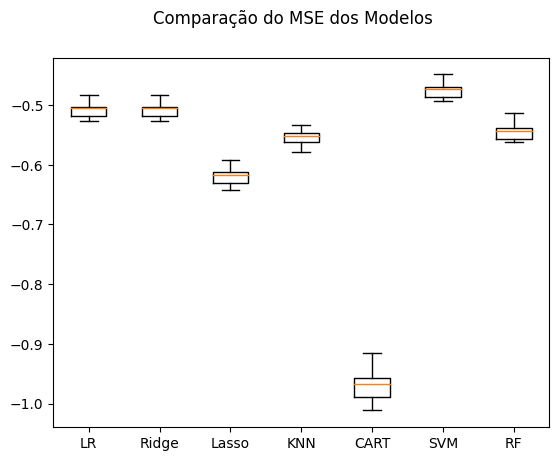

In [8]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor(n_estimators=100, random_state=42)))

for name, model in models:
    cv_results = cross_val_score(model, df_chi2_train, alvo_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação do MSE dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()


# Mutual

### Desempenho do Treinamento

LR: MSE 0.46 (0.01) - RMSE 0.68
Ridge: MSE 0.46 (0.01) - RMSE 0.68
Lasso: MSE 0.57 (0.01) - RMSE 0.76
KNN: MSE 0.53 (0.02) - RMSE 0.73
CART: MSE 0.87 (0.03) - RMSE 0.93
SVM: MSE 0.44 (0.01) - RMSE 0.66
RF: MSE 0.43 (0.01) - RMSE 0.66


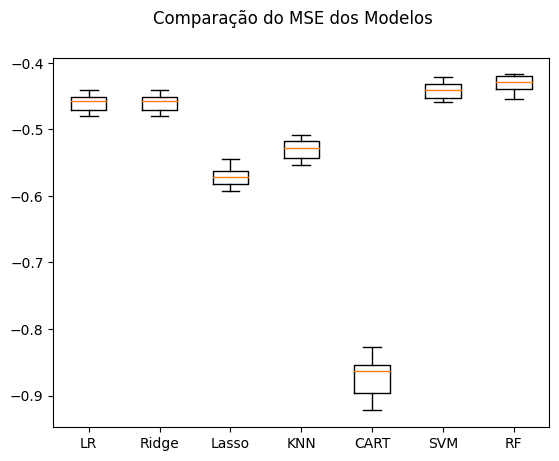

In [9]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor(n_estimators=100, random_state=42)))

for name, model in models:
    cv_results = cross_val_score(model, df_mutual_train, alvo_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação do MSE dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

# Random Feature Elimination (RFE)

### Desempenho do Treinamento

LR: MSE 0.50 (0.01) - RMSE 0.71
Ridge: MSE 0.50 (0.01) - RMSE 0.71
Lasso: MSE 0.57 (0.01) - RMSE 0.76
KNN: MSE 0.65 (0.02) - RMSE 0.80
CART: MSE 0.91 (0.01) - RMSE 0.95
SVM: MSE 0.49 (0.01) - RMSE 0.70
RF: MSE 0.44 (0.01) - RMSE 0.66


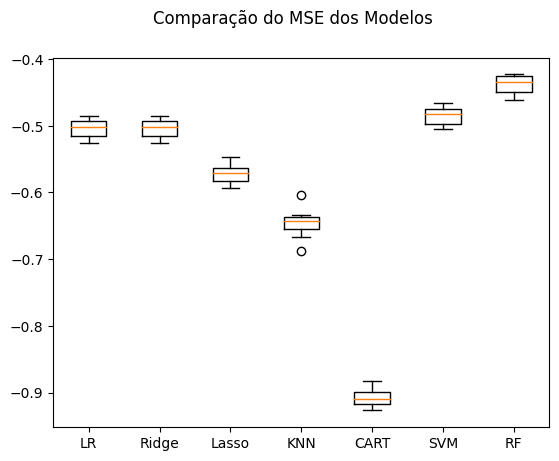

In [10]:
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
models.append(('RF', RandomForestRegressor(n_estimators=100, random_state=42)))

for name, model in models:
    cv_results = cross_val_score(model, df_rf_train, alvo_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)
    
fig = plt.figure() 
fig.suptitle('Comparação do MSE dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()